#### VARIABILE ALEATORIA BERNULLIANA
E' una distribuzione di probabilità su soli due valori chiamati ```0``` e ```1```  .  
Una distribuzione Bernulliana è parametrizzata rispetto ad un parametro ```p```  .  
```p``` indica la probabilità di successo, ovvero se ```X ~ B(p)``` allora ```P(X=1) = p```  .  
Dove con la notazione ```X ~ B(p)``` diciamo che ```X``` è estratto da una distribuzione Bernulliana di parametro ```p```  .   
Spesso, la bernulliana è associata al lancio di una moneta potenzialemente truccata, dove ```P(X=testa)=p```.

In [1]:
p=0.5
m=10
# facciamo un m di test ###
print(rbinom(m,1,p), end=" ")

 [1] 0 1 1 0 1 1 1 0 1 0


Se facciamo abbastanza esperimenti dovremmo notare che la distribuzione dei nostri lanci converge a quella teorica  .  
Questo vuol dire che anche varianza e media degli esperimenti convergeranno al valore atteso e alla varianza della distribuzione teorica.

In [2]:
# verifichiamo che il valore atteso di una bernulliana di parametro p è proprio p ###
# e che la varianza è p(1-p)                                                      ###

p = 0.75
theoretical_mean = p
theoretical_variance = p*(1-p)

# facciamo un po' di test ###
tests = rbinom(10^2,1,p)

cat("the computed mean is       :",mean(tests),"\n")
cat("the theoretical mean is    :",theoretical_mean,"\n")
cat("the computed variance is   :",var(tests),"\n")
cat("the theoretical variance is:",theoretical_variance,"\n")

the computed mean is       : 0.8 
the theoretical mean is    : 0.75 
the computed variance is   : 0.1616162 
the theoretical variance is: 0.1875 


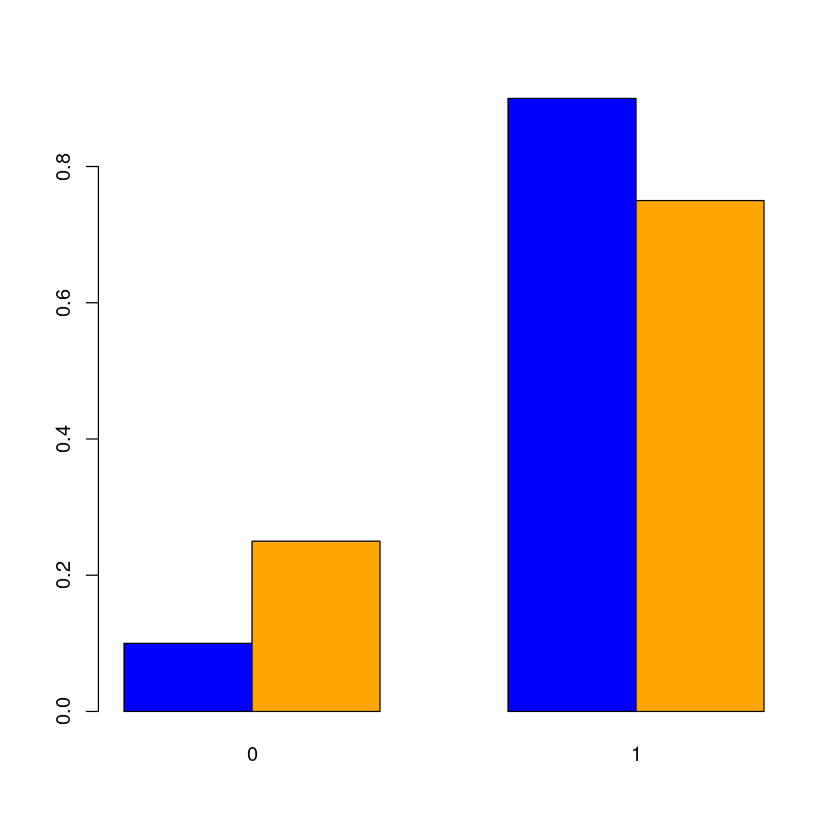

In [3]:
### plottiamo anche un istogramma ###
barplot(rbind(prop.table(table(rbinom(10,1,p))),c(1-p,p)),beside=T,col=c("blue","orange"))

### VARIABILE ALEATORIA BINOMIALE
E' la variabile aleatoria che descrive il numero di successi di un processo di Bernulli. 

<a href="https://www.codecogs.com/eqnedit.php?latex=S&space;=&space;X_1&space;&plus;&space;X_2&space;&plus;&space;\dots&space;&plus;&space;X_n&space;\text{&space;where&space;}&space;X_i&space;\sim&space;\mathcal{B}(p))" target="_blank"><img src="https://latex.codecogs.com/gif.latex?S&space;=&space;X_1&space;&plus;&space;X_2&space;&plus;&space;\dots&space;&plus;&space;X_n&space;\text{&space;where&space;}&space;X_i&space;\sim&space;\mathcal{B}(p))" title="S = X_1 + X_2 + \dots + X_n \text{ where } X_i \sim \mathcal{B}(p))" /></a>

Di conseguenza, possiamo costruire la nostra variabile aleatoria Binomiale sfruttando le Bernulliane che abbiamo costruito in precedenza.  
Diremo:

<a href="https://www.codecogs.com/eqnedit.php?latex=X&space;\sim&space;\mathcal{B}(n,p))" target="_blank"><img src="https://latex.codecogs.com/gif.latex?X&space;\sim&space;\mathcal{B}(n,p))" title="X \sim \mathcal{B}(n,p))" /></a>

Per denotare che X è estratta da una variabile aleatoria Binomiale caratterizzata da i parametri n e p.

In [4]:
# la distribuzione binomiale B(n,p) somma n variabili aleatorie indipendenti ###
mybinom0 = function(n=10,p=0.5) {
    prove = rbinom(n,1,p)
    successi = sum(prove)
    return(successi)
}

# facciamo un po' di test ###
for (i in 1:10) {
    cat(mybinom0(), " ")
}
cat("\n")

mybinom = function(n=10,p=0.5,nprove=10^2) {
    prove = c()
    for (i in 1:nprove) { prove = c(prove,mybinom0(n=n,p=p))}
    return(prove)
}

print(mybinom(n=10,p=0.5,nprove=10^2))

3  6  8  6  2  4  4  6  3  6  
  [1] 6 6 4 4 6 4 4 8 5 4 4 8 3 6 4 7 5 6 8 6 6 6 7 3 6 3 3 6 4 4 7 6 6 5 5 6 3
 [38] 4 5 2 2 4 5 3 6 4 6 6 3 6 6 6 5 8 2 3 3 4 7 5 5 5 5 6 5 7 5 5 7 3 5 6 5 4
 [75] 5 6 6 6 6 5 5 4 6 4 5 7 6 3 4 6 6 7 8 7 2 4 8 2 9 5


Ancora una volta possiamo verificare che con l'aumentare del numero di tentativi la distribuzione ottenuta converge a quella teorica.

In [5]:
# verifichiamo che il valore atteso di una binomiale di parametro n,p è n*p ###
# e che la varianza è n*p*(1-p)                                             ###

p = 0.25
n = 10
theoretical_mean = n*p
theoretical_variance = n*p*(1-p)

# facciamo un mille di test ###
tests = mybinom(n,p,10^4)
     
cat("the computed mean is       :",mean(tests),"\n")
cat("the theoretical mean is    :",theoretical_mean,"\n")
cat("the computed variance is   :",var(tests),"\n")
cat("the theoretical variance is:",theoretical_variance,"\n")

the computed mean is       : 2.5189 
the theoretical mean is    : 2.5 
the computed variance is   : 1.892032 
the theoretical variance is: 1.875 


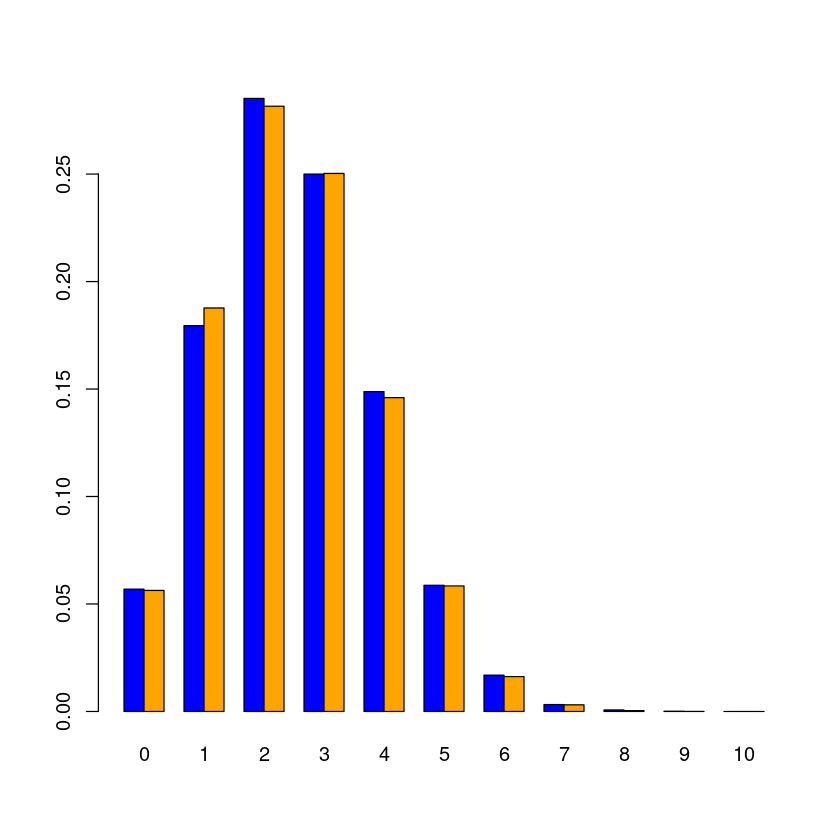

In [6]:
# ancora una volta, facciamo il plot dell'istogramma ###

freqs = rep(0,n+1)
for (t in tests) { freqs[t+1] = freqs[t+1] + 1 }
freqs = setNames(freqs/length(tests),0:n)

barplot(rbind(freqs,dbinom(0:n,size=n,prob=p)), beside=T, col=c("blue","orange"))

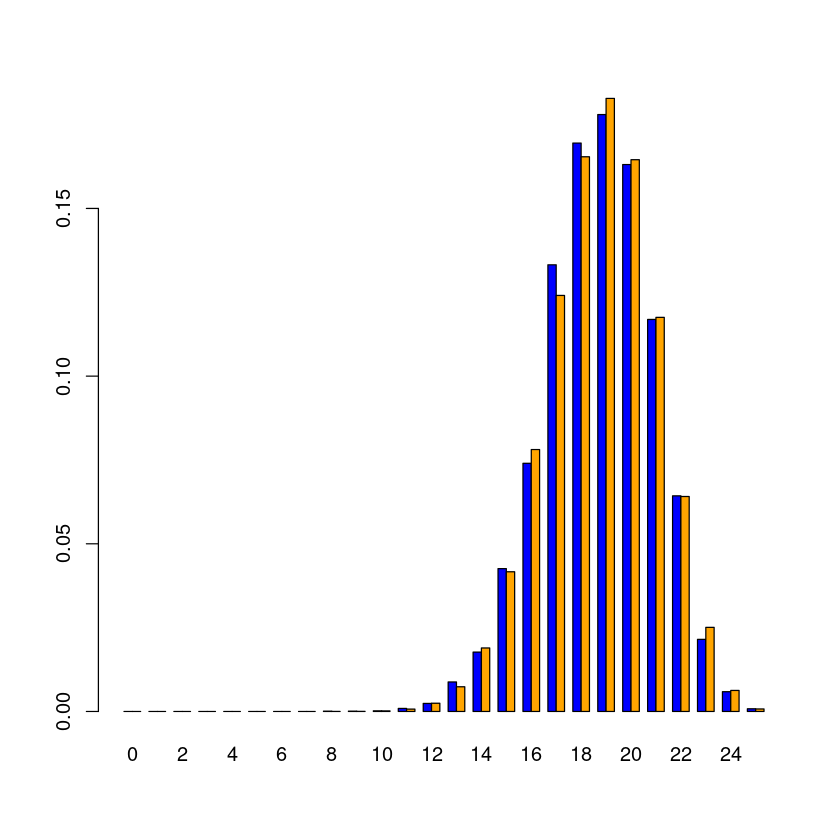

In [7]:
# possiamo giocare un po' con la binomiale                    ###
# creaiamo una funzione che plotti una simulazione dati n e p ###
# e la compari con la controparte teorica                     ###

plot_binomial = function(n=5,p=0.5,nprove=10**5) {

    tests = mybinom(n=n,p=p,nprove=nprove)
    
    freqs = rep(0,n+1)
    for (t in tests) { freqs[t+1] = freqs[t+1] + 1 }
    freqs = setNames(freqs/length(tests),0:n)
    
    barplot(rbind(freqs,dbinom(0:n,size=n,prob=p)), beside=T, col=c("blue","orange"))
}
             
plot_binomial(n=25,p=0.75,nprove=10000)

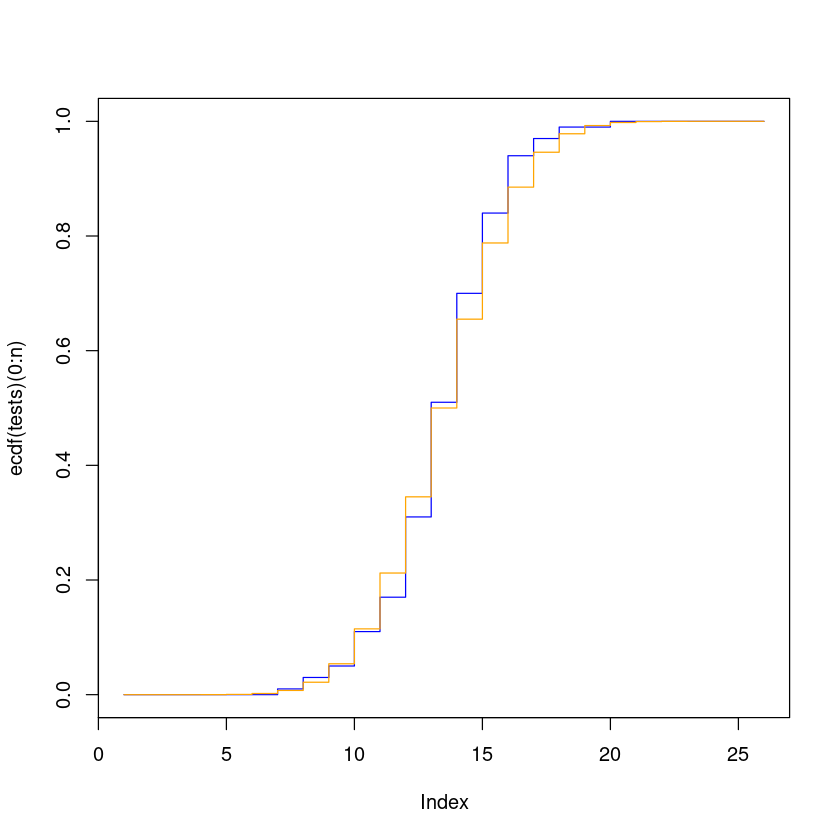

In [8]:
# possiamo giocare un po' con la binomiale                    ###
# creaiamo una funzione che plotti una simulazione dati n e p ###
# e la compari con la controparte teorica                     ###
# questa volta con la cumulata                                ###

plot_binomial = function(n=5,p=0.5,nprove=10**5) {

    tests = mybinom(n=n,p=p,nprove=nprove)

    #plot( ecdf(tests), verticals=TRUE, do.points=FALSE, col="blue")
    plot( ecdf(tests)(0:n), type='s', col='blue')
    lines( cumsum(dbinom(0:n,size=n,prob=p)), type='s', col='orange')
}
    
plot_binomial(n=25,p=0.5,nprove=100)

In ultimo vediamo cosa succede al qqplot di una binomiale rispetto ad una normale.  
Nella seguente simulazione vengono fatte 10000 campionamenti dalla nostra binomiale prima con ```n=10``` poi ```n=25``` a seguire ```n=50``` e infine ```n=100```  .  
cosa accadra per n che tende a infinito?

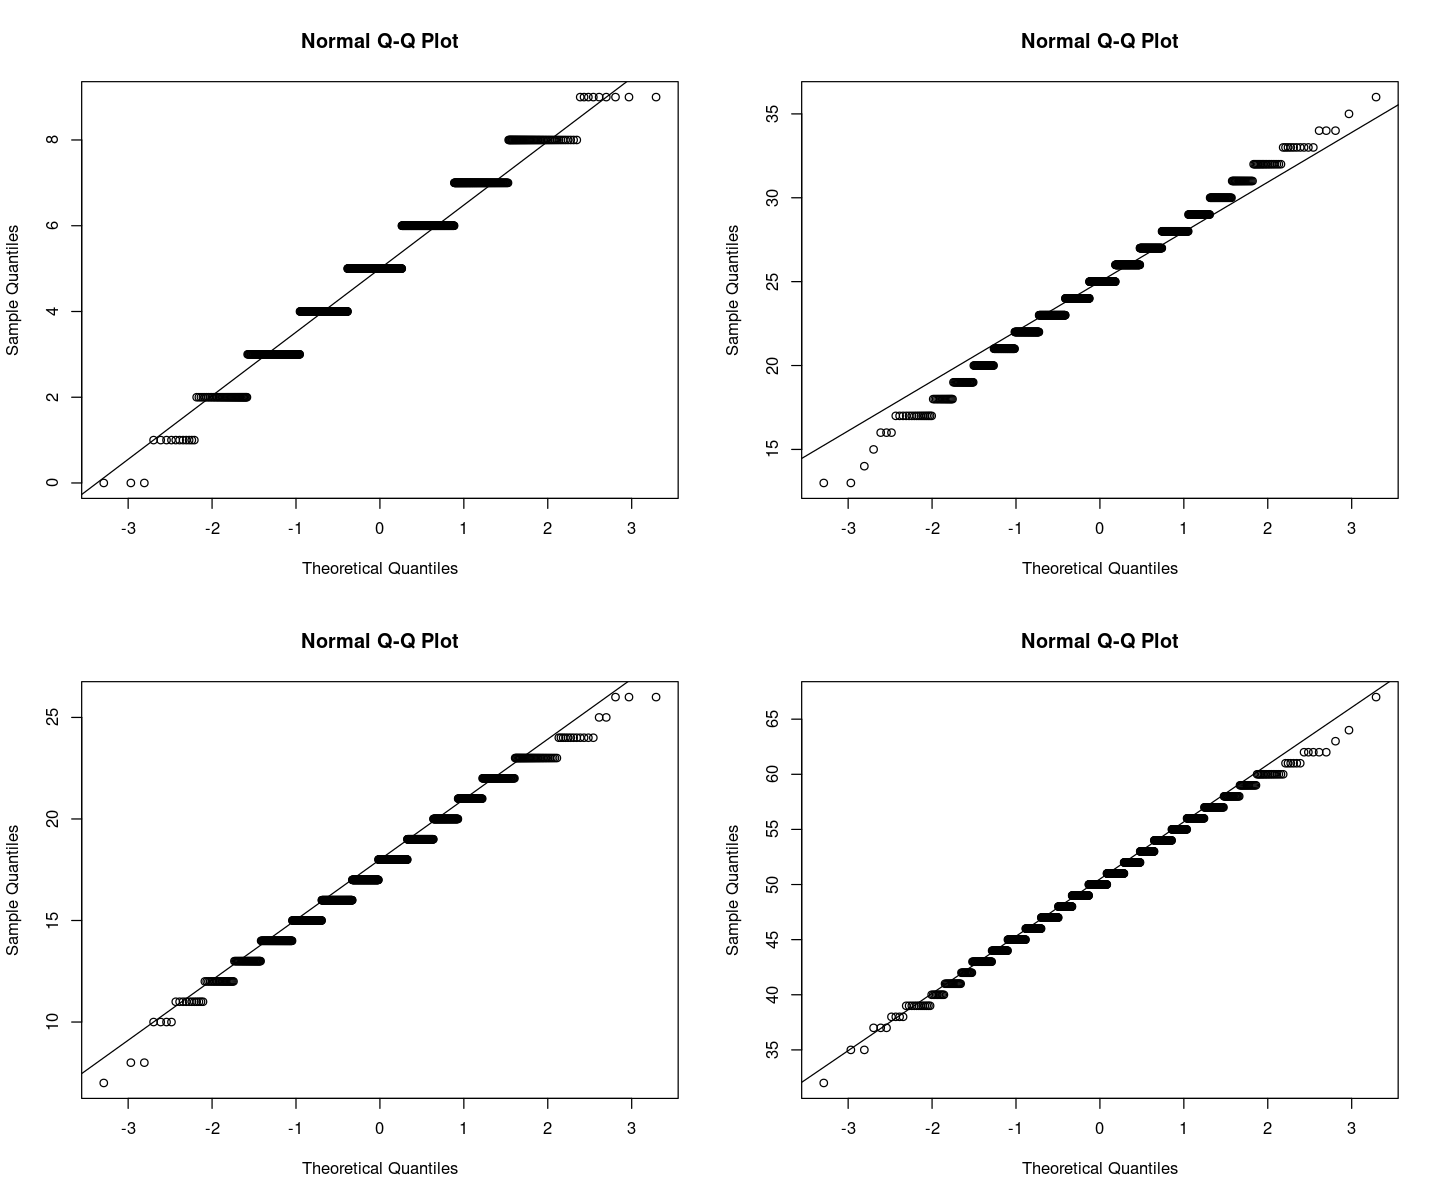

In [9]:
# esiste un metodo che campiona dalla binomiale ###

library(repr)
layout(matrix(1:4,2,2))
options(repr.plot.width = 12, repr.plot.height = 10)

plot_qq = function(n=5,p=0.5,nprove=10^3) {
    tests = rbinom(size=n, prob=p, n=nprove)
    qqnorm(tests)
    qqline(tests)
}
plot_qq(n=10,p=0.5,nprove=10^3)
plot_qq(n=35,p=0.5,nprove=10^3)
plot_qq(n=50,p=0.5,nprove=10^3)
plot_qq(n=100,p=0.5,nprove=10^3)